## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
    """Code Here
    建立你的神經網路
    """

    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 93us/step - loss: 2.2720 - acc: 0.1644 - val_loss: 2.2039 - val_acc: 0.2209
Epoch 2/500
50000/50000 [==============================] - 2s 40us/step - loss: 2.1705 - acc: 0.2400 - val_loss: 2.1371 - val_acc: 0.2549
Epoch 3/500
50000/50000 [==============================] - 2s 40us/step - loss: 2.1113 - acc: 0.2675 - val_loss: 2.0859 - val_acc: 0.2792
Epoch 4/500
50000/50000 [==============================] - 2s 40us/step - loss: 2.0649 - acc: 0.2845 - val_loss: 2.0452 - val_acc: 0.2967
Epoch 5/500
50000/50000 [==============================] - 2s 40us/step - loss: 2.0277 - acc: 0.2979 - val_loss: 2.0115 - val_acc: 0.3102
Epoch 6/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.9969 - acc: 0.3071 - val_loss: 1.9841 - val_acc: 0.3142
Epoch 7/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.9712 - acc: 0.3161 - val_loss: 1.9601 - 

50000/50000 [==============================] - 2s 41us/step - loss: 1.6458 - acc: 0.4279 - val_loss: 1.6511 - val_acc: 0.4260
Epoch 60/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6424 - acc: 0.4292 - val_loss: 1.6493 - val_acc: 0.4223
Epoch 61/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6393 - acc: 0.4311 - val_loss: 1.6437 - val_acc: 0.4301
Epoch 62/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6365 - acc: 0.4325 - val_loss: 1.6414 - val_acc: 0.4304
Epoch 63/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6334 - acc: 0.4333 - val_loss: 1.6366 - val_acc: 0.4309
Epoch 64/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6301 - acc: 0.4349 - val_loss: 1.6365 - val_acc: 0.4284
Epoch 65/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6276 - acc: 0.4342 - val_loss: 1.6317 - val_acc: 0.4301
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5061 - acc: 0.4776 - val_loss: 1.5323 - val_acc: 0.4554
Epoch 119/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5041 - acc: 0.4781 - val_loss: 1.5301 - val_acc: 0.4635
Epoch 120/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5024 - acc: 0.4785 - val_loss: 1.5301 - val_acc: 0.4603
Epoch 121/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.5004 - acc: 0.4787 - val_loss: 1.5254 - val_acc: 0.4627
Epoch 122/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.4986 - acc: 0.4794 - val_loss: 1.5254 - val_acc: 0.4586
Epoch 123/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4963 - acc: 0.4799 - val_loss: 1.5383 - val_acc: 0.4565
Epoch 124/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4946 - acc: 0.4801 - val_loss: 1.5215 - val_acc: 0.4595
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 41us/step - loss: 1.4105 - acc: 0.5113 - val_loss: 1.4638 - val_acc: 0.4853
Epoch 177/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4092 - acc: 0.5101 - val_loss: 1.4611 - val_acc: 0.4833
Epoch 178/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4074 - acc: 0.5104 - val_loss: 1.4598 - val_acc: 0.4845
Epoch 179/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4061 - acc: 0.5112 - val_loss: 1.4576 - val_acc: 0.4847
Epoch 180/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4044 - acc: 0.5118 - val_loss: 1.4567 - val_acc: 0.4843
Epoch 181/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4030 - acc: 0.5120 - val_loss: 1.4646 - val_acc: 0.4828
Epoch 182/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.4019 - acc: 0.5131 - val_loss: 1.4541 - val_acc: 0.4849
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 41us/step - loss: 1.3309 - acc: 0.5355 - val_loss: 1.4181 - val_acc: 0.4934
Epoch 235/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3299 - acc: 0.5373 - val_loss: 1.4141 - val_acc: 0.5017
Epoch 236/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3279 - acc: 0.5373 - val_loss: 1.4163 - val_acc: 0.4986
Epoch 237/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3271 - acc: 0.5383 - val_loss: 1.4202 - val_acc: 0.4976
Epoch 238/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3262 - acc: 0.5381 - val_loss: 1.4360 - val_acc: 0.4935
Epoch 239/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3251 - acc: 0.5387 - val_loss: 1.4068 - val_acc: 0.5013
Epoch 240/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3232 - acc: 0.5395 - val_loss: 1.4075 - val_acc: 0.5025
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 41us/step - loss: 1.2601 - acc: 0.5595 - val_loss: 1.3860 - val_acc: 0.5044
Epoch 293/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2591 - acc: 0.5611 - val_loss: 1.3859 - val_acc: 0.5055
Epoch 294/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2581 - acc: 0.5602 - val_loss: 1.4054 - val_acc: 0.5038
Epoch 295/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2564 - acc: 0.5618 - val_loss: 1.3794 - val_acc: 0.5073
Epoch 296/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.2556 - acc: 0.5608 - val_loss: 1.3821 - val_acc: 0.5056
Epoch 297/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2544 - acc: 0.5610 - val_loss: 1.3786 - val_acc: 0.5125
Epoch 298/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.2528 - acc: 0.5625 - val_loss: 1.3870 - val_acc: 0.5121
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 41us/step - loss: 1.1953 - acc: 0.5815 - val_loss: 1.3604 - val_acc: 0.5189
Epoch 351/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1945 - acc: 0.5834 - val_loss: 1.3535 - val_acc: 0.5184
Epoch 352/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.1935 - acc: 0.5814 - val_loss: 1.3597 - val_acc: 0.5140
Epoch 353/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.1931 - acc: 0.5844 - val_loss: 1.3535 - val_acc: 0.5173
Epoch 354/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1914 - acc: 0.5836 - val_loss: 1.3520 - val_acc: 0.5192
Epoch 355/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.1901 - acc: 0.5849 - val_loss: 1.3717 - val_acc: 0.5160
Epoch 356/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.1879 - acc: 0.5855 - val_loss: 1.3540 - val_acc: 0.5180
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 40us/step - loss: 1.1334 - acc: 0.6041 - val_loss: 1.3795 - val_acc: 0.5135
Epoch 409/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.1327 - acc: 0.6054 - val_loss: 1.4188 - val_acc: 0.5052
Epoch 410/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.1323 - acc: 0.6050 - val_loss: 1.3515 - val_acc: 0.5225
Epoch 411/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.1297 - acc: 0.6075 - val_loss: 1.3453 - val_acc: 0.5251
Epoch 412/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.1296 - acc: 0.6052 - val_loss: 1.3915 - val_acc: 0.5090
Epoch 413/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.1283 - acc: 0.6061 - val_loss: 1.3549 - val_acc: 0.5212
Epoch 414/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.1272 - acc: 0.6079 - val_loss: 1.3506 - val_acc: 0.5214
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 40us/step - loss: 1.0756 - acc: 0.6252 - val_loss: 1.3524 - val_acc: 0.5228
Epoch 467/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.0743 - acc: 0.6270 - val_loss: 1.4043 - val_acc: 0.5111
Epoch 468/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.0722 - acc: 0.6268 - val_loss: 1.3419 - val_acc: 0.5248
Epoch 469/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.0698 - acc: 0.6273 - val_loss: 1.3316 - val_acc: 0.5301
Epoch 470/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.0691 - acc: 0.6286 - val_loss: 1.3521 - val_acc: 0.5204
Epoch 471/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.0696 - acc: 0.6277 - val_loss: 1.3375 - val_acc: 0.5324
Epoch 472/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.0687 - acc: 0.6283 - val_loss: 1.3997 - val_acc: 0.5113
Epoch 473/500
50000/50000 [=======

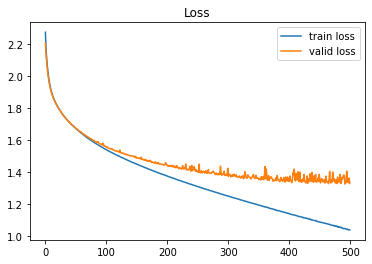

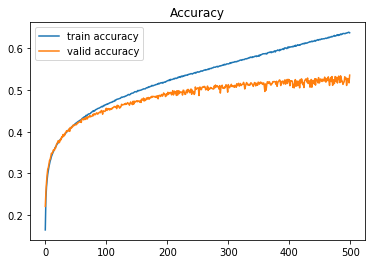

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()